<a href="https://colab.research.google.com/github/Rioba-Ian/Statistics/blob/main/Markowitz_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
aapl = pd.read_csv('/content/sample_data/AAPL_CLOSE', index_col='Date', parse_dates=True)
cisco = pd.read_csv('/content/sample_data/CISCO_CLOSE', index_col='Date', parse_dates=True)
amzn = pd.read_csv('/content/sample_data/AMZN_CLOSE', index_col='Date', parse_dates=True)
ibm = pd.read_csv('/content/sample_data/IBM_CLOSE', index_col='Date', parse_dates=True)

In [3]:
stocks = pd.concat([aapl, cisco, amzn, ibm], axis=1)
stocks.columns = ['aapl', 'cisco', 'ibm', 'amzn']

In [4]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,179.03,160.830881
2012-01-04,53.348386,16.057180,177.51,160.174781
2012-01-05,53.940658,15.997991,177.61,159.415086
2012-01-06,54.504543,15.938801,182.61,157.584912
2012-01-09,54.418089,16.040268,178.56,156.764786


In [5]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.001328
amzn     0.000081
dtype: float64

In [6]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.235487,0.297498
cisco,0.301990,1.000000,0.284470,0.424672
ibm,0.235487,0.284470,1.000000,0.258492
amzn,0.297498,0.424672,0.258492,1.000000


In [7]:
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.008490,-0.004079
2012-01-05,0.011102,-0.003686,0.000563,-0.004743
2012-01-06,0.010454,-0.003700,0.028152,-0.011481
2012-01-09,-0.001586,0.006366,-0.022178,-0.005204


In [8]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.008526,-0.004088
2012-01-05,0.011041,-0.003693,0.000563,-0.004754
2012-01-06,0.010400,-0.003707,0.027763,-0.011547
2012-01-09,-0.001587,0.006346,-0.022428,-0.005218


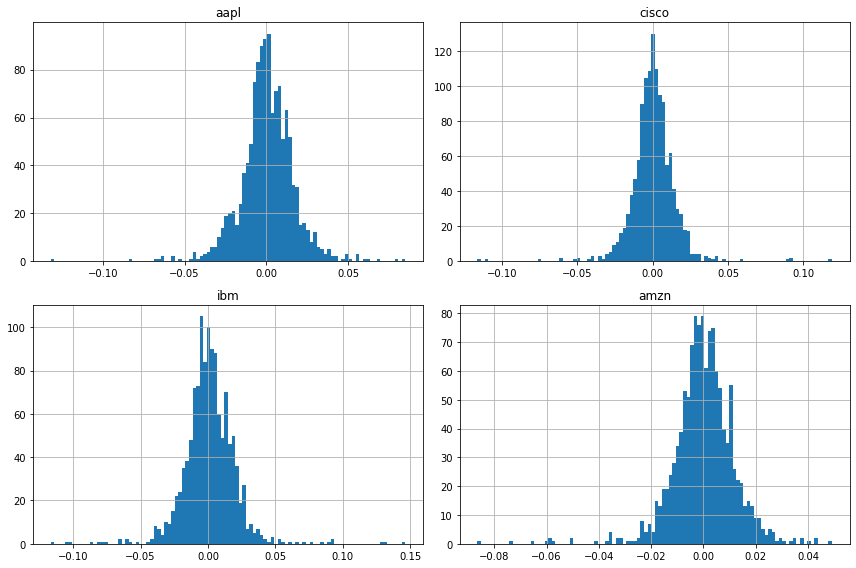

In [9]:
log_ret.hist(bins=100, figsize=(12,8))
plt.tight_layout()

In [10]:
log_ret.mean()

aapl     0.000614
cisco    0.000497
ibm      0.001139
amzn     0.000011
dtype: float64

In [11]:
log_ret.cov()*252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.018986,0.014464
cisco,0.017854,0.051381,0.019956,0.018029
ibm,0.018986,0.019956,0.094470,0.014939
amzn,0.014464,0.018029,0.014939,0.035203


In [14]:
np.random.seed(101)
num_ports = 5000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr  = np.zeros(num_ports)
for ind in range(num_ports):
    #weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)

    #save weights
    all_weights[ind, :] = weights

    #Expected return
    ret_arr[ind] = np.sum( (log_ret.mean() * weights) *252)

    #expected volatility
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))

    #Sharpe ratio 
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]


In [16]:
sharpe_arr.max()

1.02700855562915

In [17]:
sharpe_arr.argmax()

4864

In [18]:
all_weights[1420,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [20]:
max_sr_ret = ret_arr[1420]
max_sr_vol = vol_arr[1420]

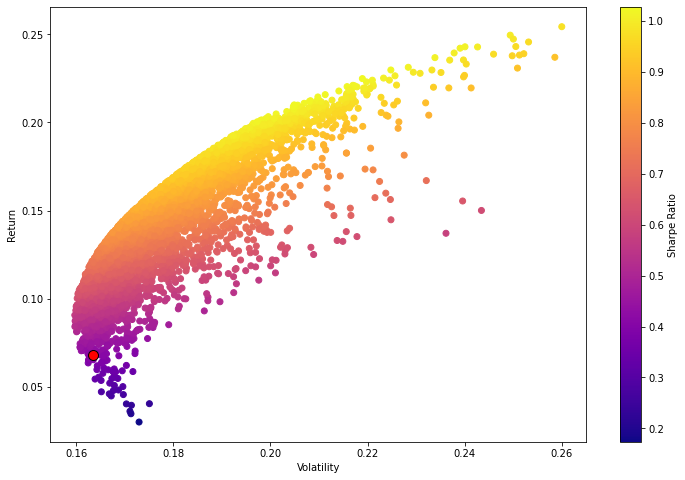

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')


plt.scatter(max_sr_vol, max_sr_ret, c='red', s=100, edgecolors='black')

In [24]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol 
    return np.array([ret,vol,sr])

In [25]:
from scipy.optimize import minimize

In [26]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [27]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [28]:
def check_sum(weights):
    #return 0 if the sum of the weights is 1
    return np.sum(weights) - 1

In [33]:
cons = ({'type':'eq', 'fun':check_sum})

In [30]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [31]:
init_guess = [0.25, 0.25, 0.25, 0.25]

In [34]:
opt_results = minimize(neg_sharpe,init_guess, method='SLSQP', bounds=bounds, constraints=cons)

In [35]:
opt_results

     fun: -1.0307168703365814
     jac: array([ 5.64306974e-05,  4.18275595e-05, -4.44799662e-05,  3.39921728e-01])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.66289770e-01, 2.04189809e-01, 5.29520421e-01, 2.11351661e-17])

In [36]:
opt_results.x

array([2.66289770e-01, 2.04189809e-01, 5.29520421e-01, 2.11351661e-17])

In [37]:
get_ret_vol_sr(opt_results.x)

array([0.21885916, 0.21233683, 1.03071687])

In [38]:
frontier_y = np.linspace(0,0.3,100)

In [39]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [40]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq','fun':lambda w:get_ret_vol_sr(w)[0]-possible_return})
    
    result = minimize(minimize_volatility, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

    frontier_volatility.append(result['fun'])
    


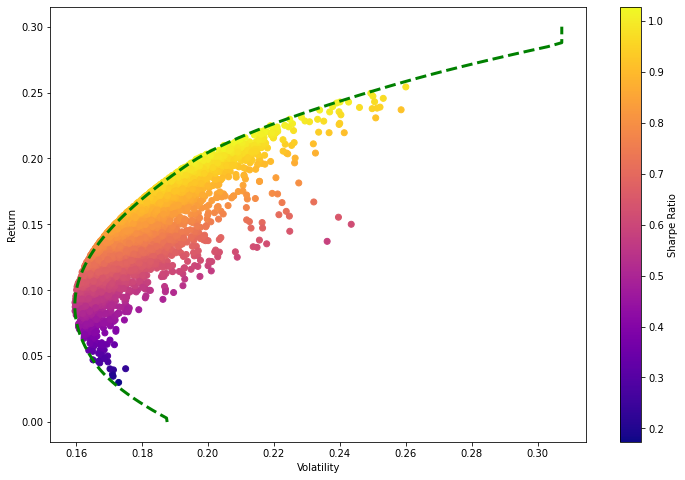

In [41]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility, frontier_y, 'g--', linewidth=3)